<a href="https://colab.research.google.com/github/nngiabao/MLPractice/blob/main/CIFAR10_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import load_model
from keras import regularizers

**Name: CIFAR-10 Image Classification with CNN**
Link: https://www.kaggle.com/code/farzadnekouei/cifar-10-image-classification-with-cnn#Step-1-%7C-Import-Necessary-Libraries


In [ ]:
#data preparation and exploration
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [70]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=0)

In [71]:
#
print('Train Images Shape: ', x_train.shape)
print('Test Labels Shape: ', y_train.shape)
#
print('Validation Images Shape: ', x_valid.shape)
print('Validation Labels Shape: ', y_valid.shape)
#
print('Test Images Shape: ', x_test.shape)
print('Test Labels Shape: ', y_test.shape)

Train Images Shape:  (45000, 32, 32, 3)
Test Labels Shape:  (45000, 1)
Validation Images Shape:  (5000, 32, 32, 3)
Validation Labels Shape:  (5000, 1)
Test Images Shape:  (10000, 32, 32, 3)
Test Labels Shape:  (10000, 1)


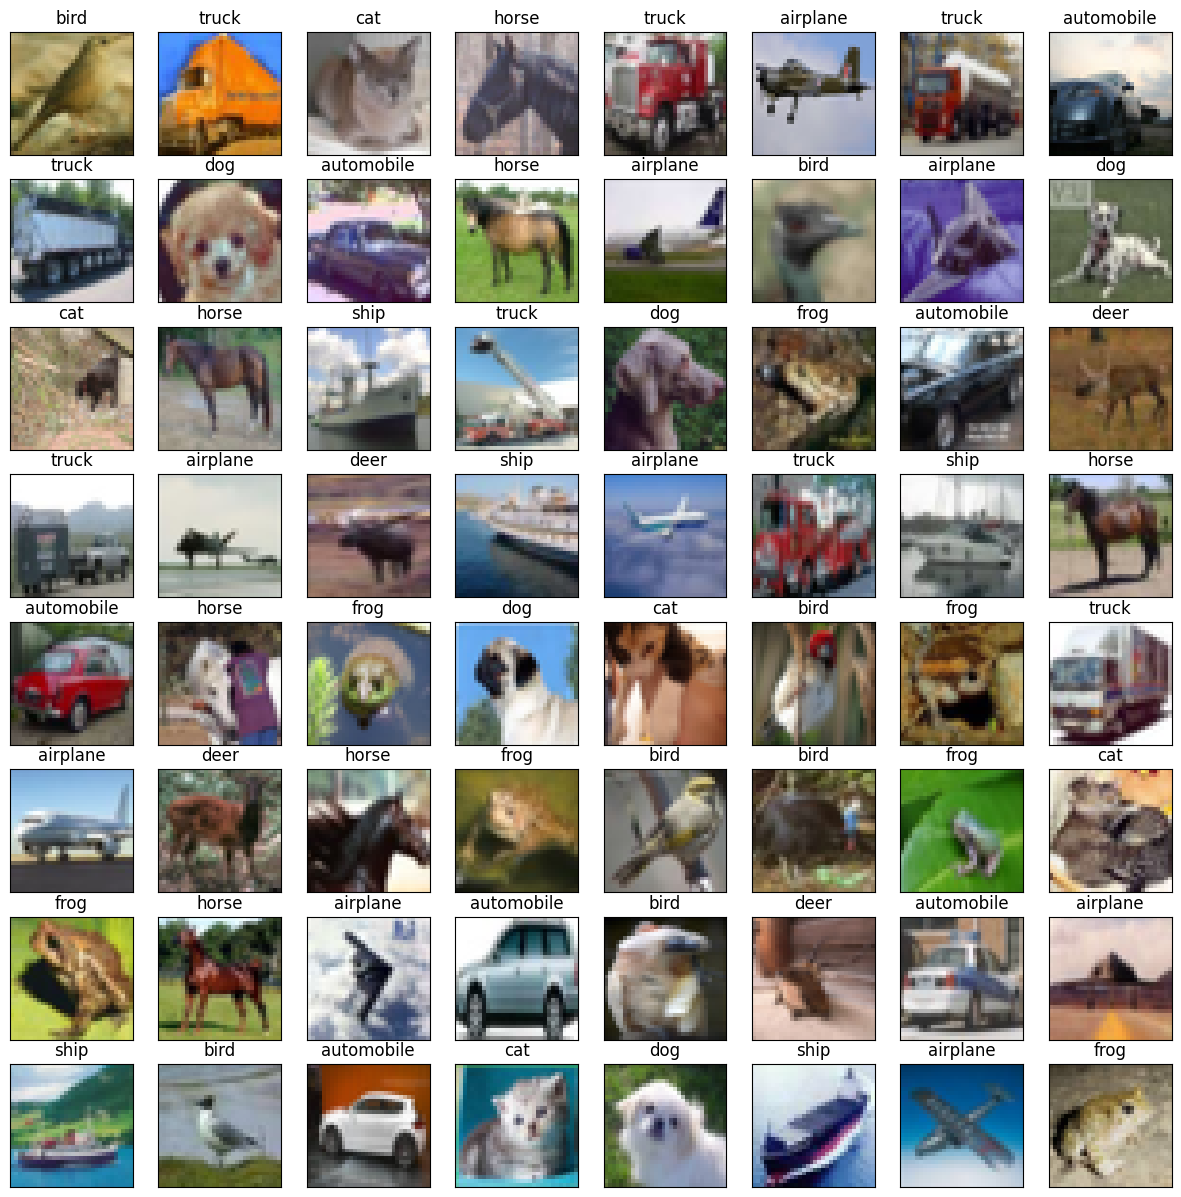

In [72]:
#set label
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#create new figure
plt.figure(figsize=(15,15))

#Loop over first 25 images
for i in range(64):
  #create a subplot
  plt.subplot(8,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

  #Display the image
  plt.imshow(x_train[i])

  #set the label as the title
  plt.title(class_names[y_train[i][0]], fontsize = 12)

#Display the figure
plt.show()

In [73]:
#Data preprocessing
#Normalization of Image Data
#One-hot encoding of Labels
#Data augmentation
#convert pixel values data type
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')

#Calculate the mean and standard deviation
mean = np.mean(x_train)
std = np.std(x_train)

#Normalize the data
x_train = (x_train - mean) / (std+1e-7)
x_valid = (x_valid - mean) / (std+1e-7)
x_test = (x_test - mean) / (std+1e-7)

In [74]:
#One-hot encoding of labels
y_train = to_categorical(y_train , 10)
y_valid = to_categorical(y_valid , 10)
y_test = to_categorical(y_test , 10)

In [75]:
#Data augmentation
data_generator = ImageDataGenerator(
    #Rotate the image randomly
    rotation_range=15,

    #Shift images horizontally by up to 12%

    height_shift_range=0.2,

    #shift images vertically by up to 12%
    width_shift_range=0.12, #x 100%

    #Randomly flip images horizontally
    horizontal_flip=True,

    #Change the brightness by up to 10%
    brightness_range=[0.9,1.1],

    #Channel  shift intensity
    channel_shift_range=0.1,
)

In [76]:
#Define CNN Model Architecture
from keras.layers import Input

#Initialize a sequential model
model = Sequential()

# Add an Input layer with the correct shape
model.add(Input(shape=x_train.shape[1:]))

#Set the weight decay value
weight_decay= 0.0001

#Add the first convolutional layer with 32 - filters 3x3
model.add(Conv2D(32, (3,3), padding='same', activation = 'relu' , kernel_regularizer=regularizers.l2(weight_decay)))
#add drop out layer
model.add(Dropout(0.2))


#Add batch normalization layer
model.add(BatchNormalization())

#Add the first max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#Add dropout layer
model.add(Dropout(0.2))

#Add the third and fourth - 64 filters
model.add(Conv2D(64, (3,3), padding='same', activation = 'relu' , kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation = 'relu' , kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())

#Add the second max pooling layer with dropout 0.3
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

#Add the fifth and sixth - 128 filters
model.add(Conv2D(128, (3,3), padding='same', activation = 'relu' , kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation = 'relu' , kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())

#Add the third max pooling layer - with dropout 0.4
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
#Add the seventh and eighth - 256 filters
model.add(Conv2D(256, (3,3), padding='same', activation = 'relu' , kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation = 'relu' , kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())

#Add the fourth max pooling layer - dropout 0.5
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
#Flatten the tensor
model.add(Flatten())

#Add a fully connected layer with softmax activation func
model.add(Dense(10, activation='softmax'))

In [77]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,176,970 (4.49 MB)

 Trainable params: 1,175,114 (4.48 MB)

 Non-trainable params: 1,856 (7.25 KB)

In [ ]:
# Set the batch size for the training
batch_size = 64

# Set the maximum number of epochs for the training
epochs = 300

# Define the optimizer (Adam)
optimizer = Adam(learning_rate=0.0005)

# Compile the model with the defined optimizer, loss function, and metrics
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Add ReduceLROnPlateau callback
# Here, the learning rate will be reduced by half (factor=0.5) if no improvement in validation loss is observed for 10 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

# Add EarlyStopping callback
# Here, training will be stopped if no improvement in validation loss is observed for 40 epochs.
# The `restore_best_weights` parameter ensures that the model weights are reset to the values from the epoch
# with the best value of the monitored quantity (in this case, 'val_loss').
early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1)

# Fit the model on the training data, using the defined batch size and number of epochs
# The validation data is used to evaluate the model's performance during training
# The callbacks implemented are learning rate reduction when a plateau is reached in validation loss and
# stopping training early if no improvement is observed
model.fit(data_generator.flow(x_train, y_train, batch_size=batch_size),
          epochs=epochs,
          validation_data=(x_valid, y_valid),
          callbacks=[reduce_lr, early_stopping],
          verbose=2)

Epoch 1/300
704/704 - 482s - 684ms/step - accuracy: 0.3225 - loss: 2.4023 - val_accuracy: 0.4124 - val_loss: 1.9266 - learning_rate: 5.0000e-04
Epoch 2/300


In [ ]:
#Visualizing the learning curves
plt.figure(figsize=(15,6))

# Plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(model.history.history['loss'], label='Train Loss', color='#8502d1')
plt.plot(model.history.history['val_loss'], label='Validation Loss', color='darkorange')
plt.legend()
plt.title('Loss Evolution')

#Plotting the trainning and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model.history.history['accuracy'], label='Train Accuracy', color='#8502d1')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy', color='darkorange')
plt.legend()
plt.title('Accuracy Evolution')
#plot show
plt.show()
#

In [ ]:
# Use the model to make predictions, evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)

In [ ]:
# Fetch the raw image from GitHub
url = "https://raw.githubusercontent.com/FarzadNekouee/Keras-CIFAR10-CNN-Model/master/truck_sample.png"
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
# Display the image
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()